In [50]:
import pandas as pd
import seaborn as sns
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#cleaning data
df['job_posted_data']=pd.to_datetime(df['job_posted_date'])

In [51]:
df_da_us=df[(df['job_country']=='United Kingdom') & (df['job_title_short']=='Data Analyst')]

df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_data
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"['sql', 'r', 'python', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-11-01 13:11:18
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None,2023-12-04 13:14:01
170,Data Analyst,Projects & Solutions Data Analyst (UK Pensions),"Birmingham, UK",via LinkedIn,Full-time,False,United Kingdom,2023-01-04 13:35:45,False,False,United Kingdom,None,NaN,NaN,Aon,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-01-04 13:35:45
206,Data Analyst,Business Intelligence / Data Analyst,United Kingdom,via SonicJobs,Full-time,False,United Kingdom,2023-02-16 13:17:48,False,False,United Kingdom,None,NaN,NaN,Michael Page Technology,['tableau'],{'analyst_tools': ['tableau']},2023-02-16 13:17:48
218,Data Analyst,Data and Strategy Analyst | Customer Success,United Kingdom,via SimplyHired,Full-time,False,United Kingdom,2023-09-01 13:35:06,True,False,United Kingdom,None,NaN,NaN,DeepL SE,['sql'],{'programming': ['sql']},2023-09-01 13:35:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784610,Data Analyst,Data Analyst,United Kingdom,via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-21 06:40:29,True,False,United Kingdom,None,NaN,NaN,Totaljobs Group,['excel'],{'analyst_tools': ['excel']},2023-01-21 06:40:29
784707,Data Analyst,Forensic Data Analyst,United Kingdom,via Forensic.jobs,Full-time,False,United Kingdom,2023-10-11 06:11:04,True,False,United Kingdom,None,NaN,NaN,Premier Group Recruitment,None,None,2023-10-11 06:11:04
784999,Data Analyst,HR Data Analyst,"Manchester, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-23 06:14:46,True,False,United Kingdom,None,NaN,NaN,Sainsbury's,None,None,2023-01-23 06:14:46
785061,Data Analyst,Data Analyst,"Manchester, UK",via LinkedIn,Contractor,False,United Kingdom,2023-11-23 06:17:48,True,False,United Kingdom,None,NaN,NaN,Quooker UK,None,None,2023-11-23 06:17:48


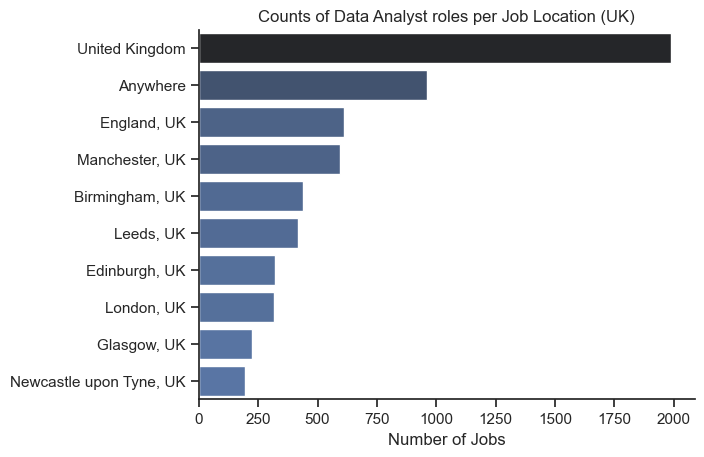

In [52]:
df_plot=df_da_us['job_location'].value_counts().head(10).to_frame()
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
df_plot
sns.despine()
plt.title('Counts of Data Analyst roles per Job Location (UK)')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

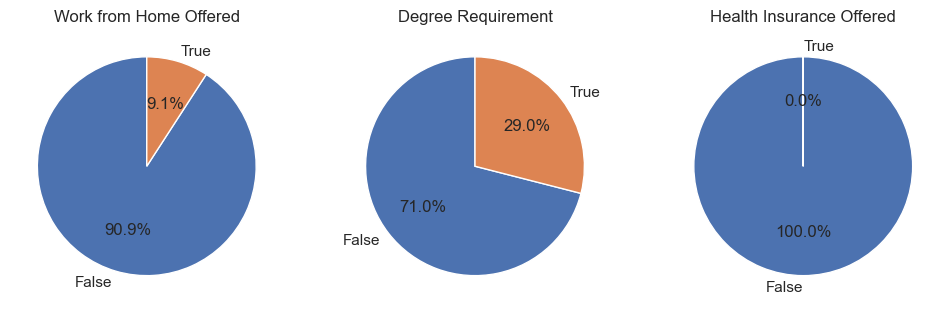

In [53]:
# rename columns
dict_column={
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax=plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), labels=['False','True'], autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)
plt.show()


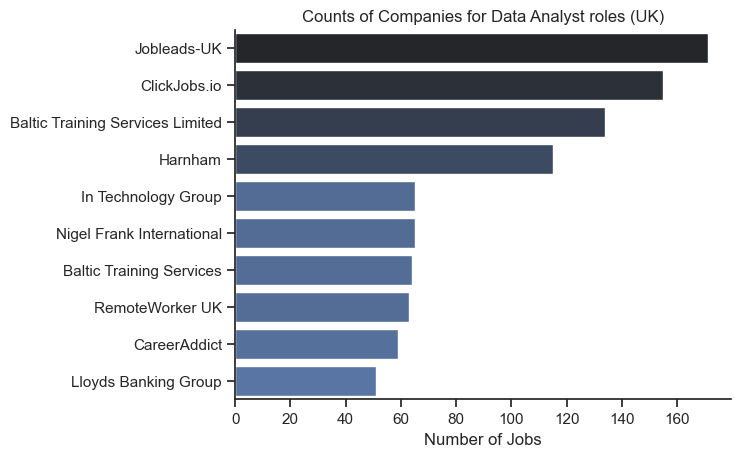

In [54]:
df_plot=df_da_us['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst roles (UK)')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()